# Proyecto final: Asignatura Visión por Computador

## Aplicación de técnicas de visión por computador para el entrenamiento de un modelo de reconocimiento de patrones

Integrantes y documentos:

*   Diego Eusse Naranjo - 1037655233
*   Juan Mauricio Herrera Duran - 1128453482
*   Rafael Arturo Matallana Lozano - 1017248867
*   Juan David Ramírez Sánchez - 1128430332

## **1. Metodología a implementar**

<p align = "justify"> Para el desarrollo del presente ejercicio, se seguirá el siguiente orden: </p>

- Origen y descripción del dataset

- Modelamiento de Datos

- Preprocesamiento de imágenes

- Segmentación de imágenes

- Extracción de características

- Reconocimiento de patrones

- Análisis de resultados

- Presentación de Conclusiones

## **2. Origen y descipción del dataset**

Se realiza un estudio inicial sobre las características estadísticas del dataset, su origen, cantidad de imágenes, tamaño de las imágenes, usos del dataset,  lo que permite conocer al dataset de una manera más clara.

Para la realización de este proyecto, cada uno de los miembros realizó una búsqueda inicial de datasets de imágenes para reconocimiento de patrones dentro de los repositorios recomendados por el profesor, con un énfasis especial en la plataforma Kaggle (https://www.kaggle.com/datasets) y cada uno seleccionó un conjunto de ellos que fuese de gusto o interés personal.

Posteriormente se realizó una elección entre todos los miembros del grupo y se escogió el dataset denominado 'Chessman image dataset: For chess lover in data science', una colección de imágenes de las diferentes piezas del clásico juego ajedrez, desarollado por Nitesh Yadav, a quien damos crédito, quien es un estudiante (Msc. Computer Science) en la University of Delhi, India, quien además dice ser un amante del ajedrez y de la ciencia de datos, por lo cual se tomó el trabajo de realizar esta colección de diferentes imágenes, obtenidas desde internet o desde su propia captura. Su perfil puede visualizarse en: https://www.kaggle.com/niteshfre 

Este dataset contiene imágenes de las diferentes piezas del juego tradicional ajedrez, en diferentes condiciones. Se trata de una colección de 556 imágenes de piezas como: Alfil, Rey, Reina, Caballo, Peón y Torre. Este dataset fue posteado alrededor de hace 2 años, por lo que se asume que pertenece al año 2019.

En el flujo de este notebook se irá realizando una limpieza general, lo que implicará la eliminación de algunas imágenes debido a extensiones no válidas '.webp', '.fcgi', '.php', o bien, debido a una segmentación poco clara.

A continuación se muestran algunas especificaciones y características del dataset escogido:

### **Link del dataset original**

https://www.kaggle.com/niteshfre/chessman-image-dataset

### **Algunas características generales**

* Este dataset contiene imágenes de diferentes piezas del ajedrez, de 6 clases diferentes:  Alfil, Rey, Reina, Caballo, Peón y Torre.

* El formato de las imágenes varía entre los formatos '.jpg' y '.png', también se verificará.

* El dataset cuenta con imágenes de un ancho máximo de  4443 px * alto máximo de 8000 px, acá se encontrarán cuáles son aquellas imágenes de mayor dimensión para cada clase.

* El dataset es ideal para trabajar y entrenar modelos de clasificación, detección y segmentación de objetos en imágenes.

### **Importamos librerías necesarias**

In [375]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from imutils import paths
import pandas as pd
import numpy as np 
import imutils
import cv2
import os
import glob
import random
import matplotlib.pyplot as plt
import os
import zipfile
import math
from PIL import Image
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Clases en el dataset

In [376]:
ls RPS

 Volume in drive C is Windows
 Volume Serial Number is DEA9-6257

 Directory of C:\Users\diego.eusse\Desktop\IA\2Semestre\VisionComputador\RPSClassifier\RPS

28/12/2021  07:08 p.ÿm.    <DIR>          .
28/12/2021  07:08 p.ÿm.    <DIR>          ..
24/12/2021  12:08 a.ÿm.    <DIR>          paper
17/10/2019  10:19 p.ÿm.               879 README_rpc-cv-images.txt
24/12/2021  12:08 a.ÿm.    <DIR>          rock
24/12/2021  12:08 a.ÿm.    <DIR>          scissors
               1 File(s)            879 bytes
               5 Dir(s)  60.301.709.312 bytes free


Se observa que el dataset cuenta con 3 clases: Paper, Rock y Scissors. 

### Creación de directorios

In [930]:
# Creamos rutas para los datos
# Ruta general
base_dir = 'RPS'

# Sub rutas
Rock = base_dir + '/rock'
Paper = base_dir + '/paper'
Scissors = base_dir + '/scissors'

directories = [Rock, Paper, Scissors]

### Cantidad de imágenes

In [378]:
total = 0
for directory in directories:
    list = os.listdir(directory)
    number_files = len(list)
    total += number_files
    print('La carpeta ' + directory + ' tiene un total de ' + repr(number_files) + ' imágenes.')
print('Con lo que se tiene un total de ' + repr(total) + ' imágenes.')

La carpeta RPS/rock tiene un total de 726 imágenes.
La carpeta RPS/paper tiene un total de 712 imágenes.
La carpeta RPS/scissors tiene un total de 750 imágenes.
Con lo que se tiene un total de 2188 imágenes.


### **Formato de las imágenes**

Durante este paso se comienza a limpiar algunas de las imágenes, cuyas extensiones no son admisibles por Python ('.webp'). Visualizamos los formatos restantes:

In [379]:
formatos = []
for directorio in directories:
    for image in os.listdir(directorio):
        formato = Image.open(directorio + '/' + image).format
        formatos.append(formato)

formatos = set(formatos)
print(formatos)

{'PNG'}


Se observa que el dataset contiene imágenes en formato .png en su totalidad.

### Tamaño de las imágenes (análisis global)

In [380]:
max_width = 0
max_height = 0
max_width_file = ''
max_height_file = ''
max_width_folder = ''
max_height_folder = ''

for directorio in directories:
    for image in os.listdir(directorio):
        width, height = Image.open(directorio + '/' + image).size
        if width > max_width:
            max_width = width
            max_width_file = image
            max_width_folder = directorio
            
        if height > max_height:
            max_height = height
            max_height_file = image
            max_height_folder = directorio
        
print('Las dimensiones máximas encontradas son: ' + repr(max_width) + ' pixeles de ancho, y ' + repr(max_height) + ' pixeles de alto.')
print('Los archivos con estas dimensiones máximas son: ' + max_width_folder + '/' + max_width_file + ' (Ancho) y ' + max_height_folder + '/' + max_height_file + ' (Alto).')

Las dimensiones máximas encontradas son: 300 pixeles de ancho, y 200 pixeles de alto.
Los archivos con estas dimensiones máximas son: RPS/rock/00nKV8oHuTGi20gq.png (Ancho) y RPS/rock/00nKV8oHuTGi20gq.png (Alto).


### Tamaño de las imágenes (por clase)

In [381]:
for directorio in directories:
    max_width = 0
    max_height = 0
    max_width_file = ''
    max_height_file = ''
    for image in os.listdir(directorio):
        
        width, height = Image.open(directorio + '/' + image).size
        if width > max_width:
            max_width = width
            max_width_file = image
            
        if height > max_height:
            max_height = height
            max_height_file = image
    print('Directorio: ' + directorio)
    print('Dimensiones máximas: ' + repr(max_width) + ' (Ancho), ' + repr(max_height) + ' (Alto).')
    print('Archivos con dimensiones máximas: ' + max_width_file + ' (Ancho) y ' + max_height_file + ' (Alto).')
    print('\n')

Directorio: RPS/rock
Dimensiones máximas: 300 (Ancho), 200 (Alto).
Archivos con dimensiones máximas: 00nKV8oHuTGi20gq.png (Ancho) y 00nKV8oHuTGi20gq.png (Alto).


Directorio: RPS/paper
Dimensiones máximas: 300 (Ancho), 200 (Alto).
Archivos con dimensiones máximas: 04l5I8TqdzF9WDMJ.png (Ancho) y 04l5I8TqdzF9WDMJ.png (Alto).


Directorio: RPS/scissors
Dimensiones máximas: 300 (Ancho), 200 (Alto).
Archivos con dimensiones máximas: 0657zSfiTYzP2jrl.png (Ancho) y 0657zSfiTYzP2jrl.png (Alto).




## **3. Modelamiento de datos**

Una vez se tiene un conocimiento general de las características del dataset, se procede a realizar un modelamiento de datos. En esta sección se busca organizar y dividir al conjunto de datos entre conjuntos de entrenamiento (train) y validación, para posteriormente utilizarlos en la implementación del modelo. Se trabajará con un 70% de las imágenes para entrenamiento, un 20% para validación y un 10% para testeo del modelo final. Esta división puede realizarse por medio de las librerías de keras-tensorflow o también mediante la librería split-folders:

### **Utilizando Keras-Tensorflow:**

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import *

Creación del conjunto de entrenamiento:

In [10]:
image_size = (256, 256)
batch = 32

train = keras.preprocessing.image_dataset_from_directory(
    'RPS/',
    validation_split=.3,
    subset='training',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 2188 files belonging to 3 classes.
Using 1532 files for training.


Creación del conjunto de validación:

In [11]:
validation = keras.preprocessing.image_dataset_from_directory(
    'RPS/',
    validation_split=.2,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 2188 files belonging to 3 classes.
Using 437 files for validation.


Creación del conjunto de testeo final:

In [12]:
test = keras.preprocessing.image_dataset_from_directory(
    'RPS/',
    validation_split=.1,
    subset='validation',
    seed=42,
    image_size=image_size,
    batch_size=batch,
    label_mode='categorical'
)

Found 2188 files belonging to 3 classes.
Using 218 files for validation.


Función para mostrar algunas imágenes de cierto dataset:

In [13]:
def display_samples(dataset, n_samples, classes_name):
    plt.figure(figsize=(10, 10))
    for images, labels in dataset.take(1):
        for i in range(n_samples):
            ax = plt.subplot(3, 3, i + 1)
            plt.imshow(images[i].numpy().astype("uint8"))
            plt.title(classes_name[np.argmax(labels[i])])
            plt.axis("off")

Mostrar algunas imágenes del conjunto de entrenamiento:

(256, 256, 3)


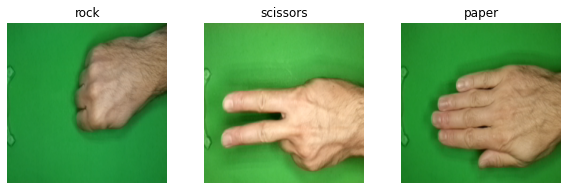

In [20]:
display_samples(train, 3, train.class_names)
for images, labels in train.take(1):
        for i in range(1):
            print(images[i].shape)

Mostrar algunas imágenes del conjunto de validación:

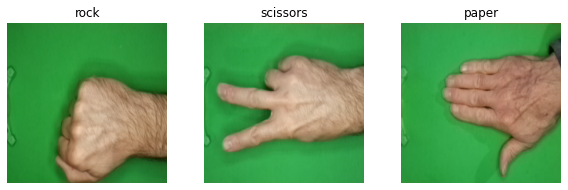

In [25]:
display_samples(validation, 3, validation.class_names)

Mostrar algunas imágenes del conjunto de testeo:

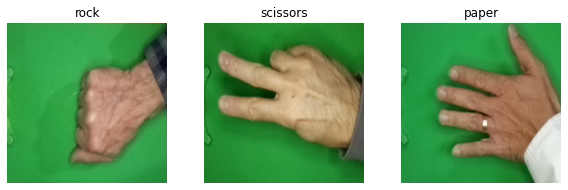

In [28]:
display_samples(test, 3, test.class_names)

### **Utilizando la librería split-folders:**

In [382]:
pip install split-folders

Note: you may need to restart the kernel to use updated packages.


Se toman los conjuntos de imágenes para cada una de las piezas del ajedrez: Bishop, King, Knight, Pawn, Queen, Rook y se genera un nuevo directorio 'ouput', donde se almacenarán 3 subdirectorios adicionales, correspondientes a los conjuntos de entrenamiento, validación y testeo, respectivamente. Se utiliza una división del 70% para entrenamiento, 20% para validación y 10% para testeo.

In [931]:
import splitfolders
splitfolders.ratio(base_dir, output="RPS/output", ratio=(0.7, 0.2, 0.1))

Copying files: 2188 files [00:15, 143.64 files/s]


Se verifica la carpeta 'output':

In [823]:
ls RPS\output

 Volume in drive C is Windows
 Volume Serial Number is DEA9-6257

 Directory of C:\Users\diego.eusse\Desktop\IA\2Semestre\VisionComputador\RPSClassifier\RPS\output

28/12/2021  09:45 p.ÿm.    <DIR>          .
28/12/2021  09:45 p.ÿm.    <DIR>          ..
28/12/2021  09:45 p.ÿm.    <DIR>          train
28/12/2021  09:45 p.ÿm.    <DIR>          val
               0 File(s)              0 bytes
               4 Dir(s)  59.621.195.776 bytes free


### Funciones generales a utilizar en el procesamiento de imágenes:

In [932]:
def image_to_feature_vector(image, size=(128, 128)):
    # Convirtiendo imagen a un tamaño fijo y luego la aplanamos
    return cv2.resize(image, size).flatten()

def extract_color_histogram(image, bins=(8, 8, 8)):
  # Convertimos a HSV y obtenemos un histograma
    hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    hist = cv2.calcHist([hsv], [0, 1, 2], None, bins,
        [0, 180, 0, 256, 0, 256])
    # Normalizamos hist
    if imutils.is_cv2():
        hist = cv2.normalize(hist)
    else:
        cv2.normalize(hist, hist)
    return hist.flatten()

### Generación de conjuntos de entrenamiento, validación y testeo con clases mezcladas, manteniendo las etiquetas de cada una de las imágenes:

Se actualizan rutas para los datos:

In [933]:
# Ruta general
base_dir = 'RPS/output/'

# Sub rutas
train_dir = base_dir + 'train/'
val_dir = base_dir + 'val/'
test_dir = base_dir + 'test/'

# Classes -> rock, paper, scissors

# Rutas entrenamiento por clases
train_rock_dir = train_dir + 'rock'
train_paper_dir = train_dir + 'paper'
train_scissors_dir = train_dir + 'scissors'

# Rutas validacion por clases
val_rock_dir = val_dir + 'rock'
val_paper_dir = val_dir + 'paper'
val_scissors_dir = val_dir + 'scissors'

# Rutas testeo por clases
test_rock_dir = test_dir + 'rock'
test_paper_dir = test_dir + 'paper'
test_scissors_dir = test_dir + 'scissors'

Se mezclan todos 'paths' de las diferentes clases para la creación de los datasets mezclados de entrenamiento, validación y testeo:

In [934]:
# Número de 'classes' en este caso vecinos para el algoritmo en como queremos agrupar
neighbors = 3
SEED = 42
root_dir = 'C:/Users/diego.eusse/Desktop/IA/2Semestre/VisionComputador/RPSClassifier/'

# Creamos un solo conjunto de datos entrenamiento combinando rutas de grapes y strawberries
# organizamos aleatoriamente # Classes -> rock, paper, scissors
data_rock = glob.glob(root_dir + train_rock_dir + '/*')
data_paper = glob.glob(root_dir + train_paper_dir + '/*')
data_scissors = glob.glob(root_dir + train_scissors_dir + '/*')
train_data_paths = data_rock + data_paper + data_scissors
random.shuffle(train_data_paths)

# Creamos un solo conjunto de datos de validación combinando rutas de grapes y strawberries
# organizamos aleatoriamente
val_rock = glob.glob(root_dir + val_rock_dir + '/*')
val_paper = glob.glob(root_dir + val_paper_dir + '/*')
val_scissors = glob.glob(root_dir + val_scissors_dir + '/*')
val_data_paths = val_rock + val_paper + val_scissors
random.shuffle(val_data_paths)

# Creamos un solo conjunto de datos testing combinando rutas de grapes y strawberries
# organizamos aleatoriamente
test_rock = glob.glob(root_dir + test_rock_dir + '/*')
test_paper = glob.glob(root_dir + test_paper_dir + '/*')
test_scissors = glob.glob(root_dir + test_scissors_dir + '/*')
test_data_paths = test_rock + test_paper + test_scissors
random.shuffle(test_data_paths)

In [935]:
print(f"Tamaño conjunto entrenamiento: {len(train_data_paths)}")
print(f"Tamaño conjunto de validación: {len(val_data_paths)}")
print(f"Tamaño conjunto testeo: {len(test_data_paths)}")
print(f"Tamaño total dataset: {len(train_data_paths) + len(val_data_paths) + len(test_data_paths)}")

Tamaño conjunto entrenamiento: 1531
Tamaño conjunto de validación: 437
Tamaño conjunto testeo: 220
Tamaño total dataset: 2188


Se genera un array con todas las imágenes de entrenamiento y otro con todos los labels de estas imágenes:

In [936]:
images = []
labels = []

for (i, imagePath) in enumerate(train_data_paths):
    # Leemos la imagen y obtenemos su etiqueta
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-2].split("/")[-1]
    
    # Obtenemos las carácteristicas de la imagen y su histograma
    pixels = image_to_feature_vector(image)
    
    # Guardamos todo en unos vectores
    images.append(pixels)
    labels.append(label)

# Convirtiendo a arrays numpy
trainImages = np.array(images)
trainLabels = np.array(labels)

In [937]:
print("Len trainImages: ", len(trainImages))
print("Len trainLabels: ", len(trainLabels))

Len trainImages:  1531
Len trainLabels:  1531


De manera similar, se realiza con los conjuntos de validación y testeo:

In [938]:
images = []
labels = []

for (i, imagePath) in enumerate(val_data_paths):
    # Leemos la imagen y obtenemos su etiqueta
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-2].split("/")[-1]
    
    # Obtenemos las carácteristicas de la imagen y su histograma
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    
    # Guardamos todo en unos vectores
    images.append(pixels)
    labels.append(label)

# Convirtiendo a arrays numpy
validationImages = np.array(images)
validationLabels = np.array(labels)

In [939]:
print("Len validationImages: ", len(validationImages))
print("Len validationLabels: ", len(validationLabels))

Len validationImages:  437
Len validationLabels:  437


In [940]:
images = []
labels = []

for (i, imagePath) in enumerate(test_data_paths):
    # Leemos la imagen y obtenemos su etiqueta
    image = cv2.imread(imagePath)
    label = imagePath.split(os.path.sep)[-2].split("/")[-1]
    
    # Obtenemos las carácteristicas de la imagen y su histograma
    pixels = image_to_feature_vector(image)
    hist = extract_color_histogram(image)
    
    # Guardamos todo en unos vectores
    images.append(pixels)
    labels.append(label)

# Convirtiendo a arrays numpy
testImages = np.array(images)
testLabels = np.array(labels)

In [941]:
print("Len testImages: ", len(testImages))
print("Len testLabels: ", len(testLabels))

Len testImages:  220
Len testLabels:  220


## **4. Preprocesamiento de imágenes**


En esta sección se toman algunas de las imágenes y se intenta predecir el pre-procesamiento general que se debe aplicar a las imágenes del dataset antes de la construcción del modelo. En general, se planea realizar un reshape para que cada una de las imágenes tenga un mismo tamaño y posteriormente, se podría aplicar algunos filtros, con la intención de reducir el ruido en ellas.

Se comienza por tomar alguna de las imágenes del dataset de entrenamiento (trainImages), luego de realizar su respectivo reshape a un tamaño convencional (128, 128) y 3 canales de color:

In [942]:
trainImages.shape

(1531, 49152)

In [943]:
trainImages[0].shape

(49152,)

scissors


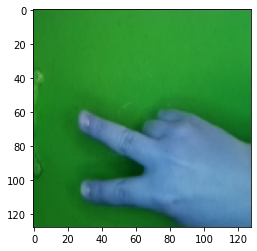

In [953]:
pic = np.reshape(trainImages[6], (128, 128, 3))
plt.imshow(pic, cmap="gray")
print(trainLabels[6])

Se intenta con un filtro de media:

Text(0.5, 1.0, 'Función Filter2D')

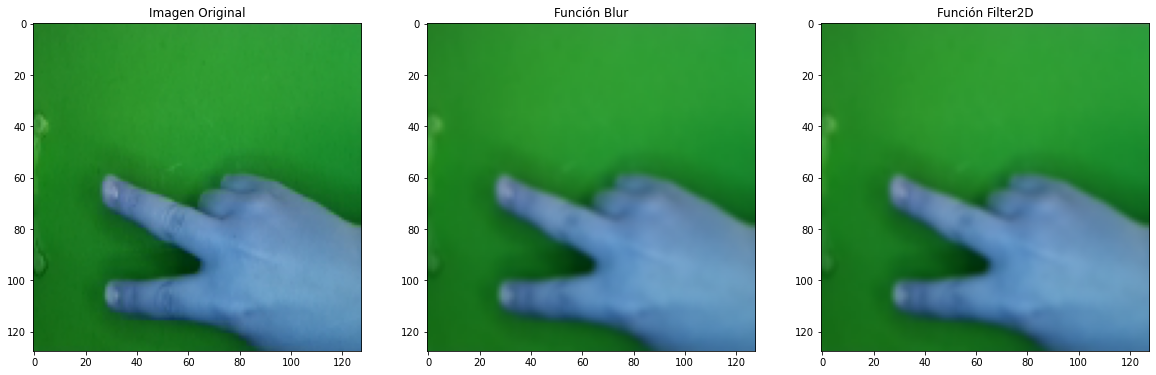

In [954]:
#Dar valor al tamaño del kernel
k_size = 3

#Aplicar suavizado mediante la función blur, con  un tipo de borde que puede cambiarse
res1 = cv2.blur(pic,(k_size,k_size),borderType=cv2.BORDER_REPLICATE)

#Aplicar el suavizado mediante filter2D
kernel = np.ones((k_size,k_size),np.float64)/(k_size**2)
res2 = cv2.filter2D(pic, ddepth= -1, kernel= kernel, borderType=cv2.BORDER_REPLICATE)

#Generar un subplot de 1x3 para mostrar imagen original, Blur y Filter2D
fig = plt.figure(figsize=(20,24))

plt.subplot(1,3,1)
plt.imshow(pic,cmap='gray')
plt.title("Imagen Original")

plt.subplot(1,3,2)
plt.imshow(res1,cmap='gray')
plt.title("Función Blur")

plt.subplot(1,3,3)
plt.imshow(res2,cmap='gray')
plt.title("Función Filter2D")

Ensayemos con el filtro de mediana:

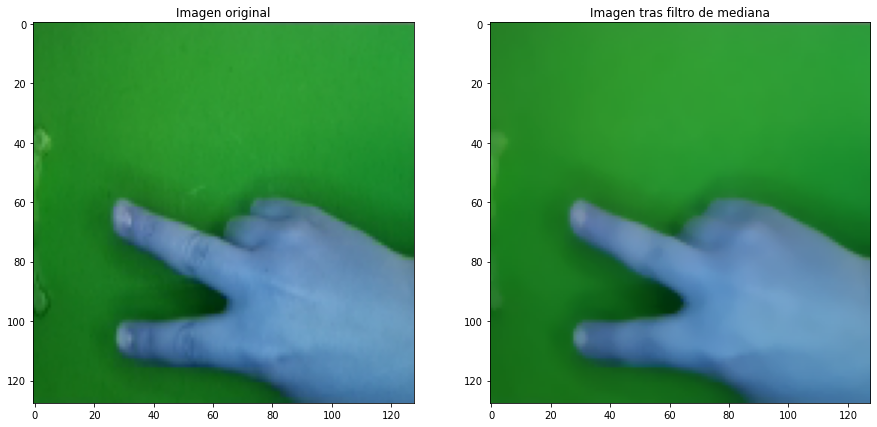

In [955]:
#Definir tamaño del kernel
k_size = 5
#Aplicar filtro de mediana a la imagen de entrada
medianBlurImg = cv2.medianBlur(pic, k_size)

#Generar un subplot 1x2 para mostrar imagen original e imagen tras filtro de mediana
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))
arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(pic, cmap="gray")

arreglo_plots[1].set_title('Imagen tras filtro de mediana')
arreglo_plots[1].imshow(medianBlurImg, cmap="gray")

Ensayamos finalmente con el filtro de máximo:

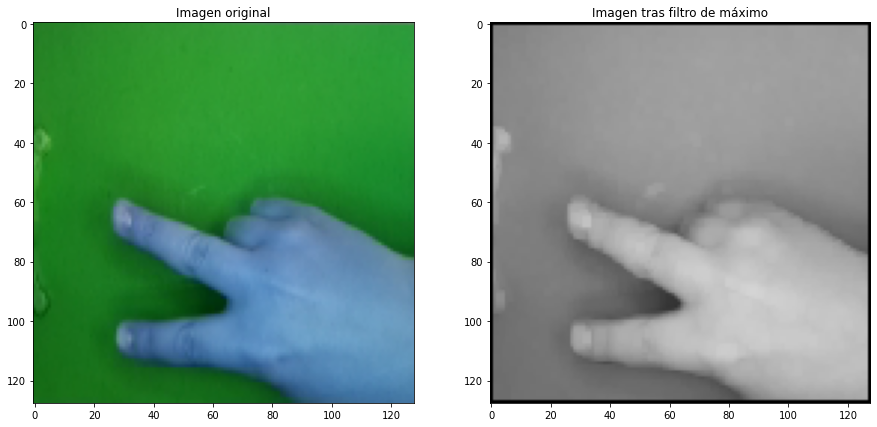

In [956]:
#Definir función de Filtro del Máximo
def maximum_filter(img,k_size):
    #Crear una matriz de ceros del tamaño de la imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Radio del kernel
    r = math.floor(k_size/2)
    #Recorrer cada posición i,j de la imagen con el kernel
    for i in range(r, img.shape[0]-r):
        for j in range(r, img.shape[1]-r):
            #Tamaño de la ventana 
            window = img[i-r:i+r+1,j-r:j+r+1]
            #Cambiar el valor de la posición i,j de la imagen por el de la ventana
            max_val = np.max(window)
            res[i,j] = max_val
    return res

#Leer imagen de entrada
img = pic

#Definir tamaño del kernel
k_size = 3 

#Aplicar filtro del Máximo a la imagen
res = maximum_filter(img, k_size)
#Recordar el tipo de dato uint8, entre 0 y 255
res = res.astype(np.uint8)

#Generar un subplot 1x2 que muestre imagen original e imagen tras filtro de máximo
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen tras filtro de máximo')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

Y con el filtro de mínimo:

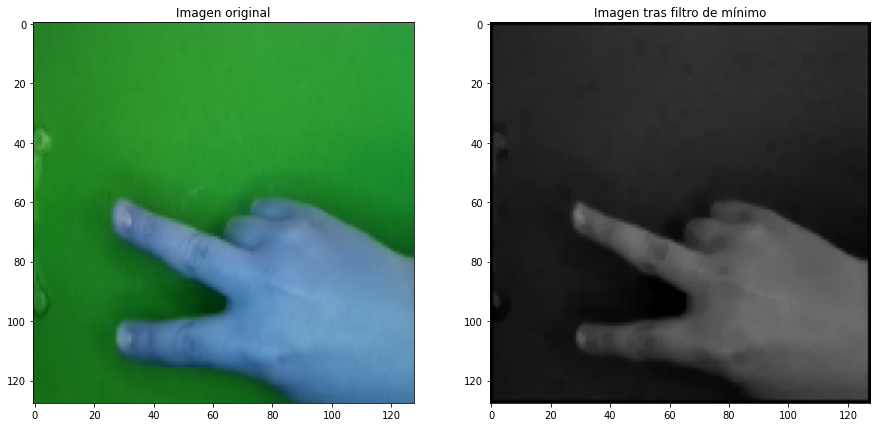

In [957]:
#Definir función filtro del mínimo
def minimum_filter(img,k_size):
    #Crear matriz de ceros del tamaño de imagen de entrada
    res = np.zeros(img.shape, np.uint8)
    #Definir el radio del kernel
    r = math.floor(k_size/2)
    #Recorrer cada posición i,j de la imagen con el kernel
    for i in range(r, img.shape[0]-r):
        for j in range(r, img.shape[1]-r):
            #Tamaño de la ventana 
            window = img[i-r:i+r+1,j-r:j+r+1]
            #Cambiar el valor de la posición i,j de la imagen por el de la ventana
            min_val = np.min(window)
            res[i,j] = min_val
    return res

#Leer la imagen de entrada
img = pic

#Definir el radio del kernel
k_size = 3

#Aplicar filtro del mínimo a la imagen de entrada
res = minimum_filter(img, k_size)

#Tipo de dato entero, entre 0 y 255
res = res.astype(np.uint8)

#Generar subplot 1x2 para mostrar imagen original e imagen tras filtro del mínimo
fig, arreglo_plots = plt.subplots(1,2, figsize=(15, 15))

arreglo_plots[0].set_title('Imagen original')
arreglo_plots[0].imshow(img, cmap="gray", vmin=0, vmax=255)

arreglo_plots[1].set_title('Imagen tras filtro de mínimo')
arreglo_plots[1].imshow(res, cmap="gray", vmin=0, vmax=255)

El filtro medianBlur retira relieves y detalles ruidosos de las manos (arrugas, vellos), conservando el contorno de las mismas. Se decide continuar con este filtro y con el reshape propuesto.

### **Cambio de espacio de color del espacio RGB al espacio HSV:**

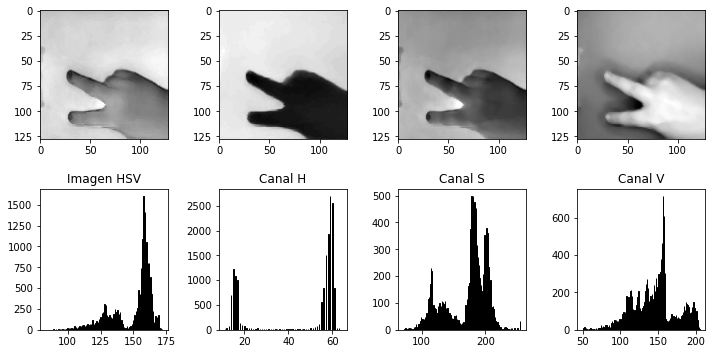

In [958]:
hsvImg = cv2.cvtColor(medianBlurImg, cv2.COLOR_BGR2HSV)

H = hsvImg[:,:,0]
S = hsvImg[:,:,1]
V = hsvImg[:,:,2]

idx = 1
fig1 = plt.figure(idx,figsize=(10, 10))
cols = 4

hsv_gray = cv2.cvtColor(hsvImg, cv2.COLOR_BGR2GRAY)

fig1.add_subplot(4, 4, 1)
plt.imshow(hsv_gray, cmap="gray")
fig1.add_subplot(4, 4, cols+1)
plt.hist(np.array(hsv_gray).ravel(), bins=256, fc='k', ec='k')
plt.title('Imagen HSV')

fig1.add_subplot(4, 4, 2)
plt.imshow(H, cmap='gray')
fig1.add_subplot(4, 4, cols+2)
plt.hist(np.array(H).ravel(),bins=256, fc='k', ec='k')
plt.title('Canal H')

fig1.add_subplot(4, 4, 3)
plt.imshow(S, cmap = 'gray')
fig1.add_subplot(4, 4, cols+3)
plt.hist(np.array(S).ravel(),bins=256, fc='k', ec='k')
plt.title('Canal S')

fig1.add_subplot(4, 4, 4)
plt.imshow(V, cmap = 'gray')
fig1.add_subplot(4, 4, cols+4)
plt.hist(np.array(V).ravel(),bins=256, fc='k', ec='k')
plt.title('Canal V')

plt.tight_layout()

Se decide continuar con el canal H luego del preprocesamiento realizado. Se aplica este mismo preprocesamiento para todas las imágenes de los diferentes datasets: entrenamiento, validación y testeo:

In [959]:
images = []
k_size = 5
# Llamar cada una de las imágenes del dataset de entrenamiento
for image in trainImages:
    # Realizar el reshape
    image = np.reshape(image, (128, 128, 3))
    #Aplicar suavizado mediante la función medianBlur
    res = cv2.medianBlur(image, k_size)
    hsvImg = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
    H = hsvImg[:,:,0]
    images.append(H)
trainImages = np.array(images)

Tenemos finalmente un array de 1531 imágenes de entrenamiento, suavizadas mediante el filtro medianBlur y con un tamaño de 128 * 128 pixeles cada una, en el canal H del espacio HSV:

In [960]:
trainImages.shape

(1531, 128, 128)

### Validation dataset

In [961]:
images = []
k_size = 5
# Llamar cada una de las imágenes del dataset de validación
for image in validationImages:
    # Realizar el reshape
    image = np.reshape(image, (128, 128, 3))
    #Aplicar suavizado mediante la función medianBlur
    res = cv2.medianBlur(image, k_size)
    hsvImg = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
    H = hsvImg[:,:,0]
    images.append(H)
validationImages = np.array(images)

In [962]:
validationImages.shape

(437, 128, 128)

### Test dataset

In [963]:
images = []
k_size = 5
# Llamar cada una de las imágenes del dataset de testeo
for image in testImages:
    # Realizar el reshape
    image = np.reshape(image, (128, 128, 3))
    #Aplicar suavizado mediante la función medianBlur
    res = cv2.medianBlur(image, k_size)
    hsvImg = cv2.cvtColor(res, cv2.COLOR_BGR2HSV)
    H = hsvImg[:,:,0]
    images.append(H)
testImages = np.array(images)

In [964]:
testImages.shape

(220, 128, 128)

## **5. Segmentación de imágenes**


La colección de imágenes presenta distintos tipos de imágenes en ambientes diferentes, ambientes no controlados, por lo que las características de cada una de las imágenes será diferente. Ante este escenario, es difícil aplicar un único modelo de segmentación para todas las imágenes, sin embargo, se intentará a continuación:

Ensayemos primero con una de las imágenes del conjunto *trainImages*, para tratar de predecir una segmentación más generalizada a aplicar a todo el conjunto. En este caso, se utiliza una imagen aleatoria. Observemos la imagen aleatoria luego del reshape y el filtro Blur realizado en la sección 4:

In [971]:
# Generar número aleatorio de imagen dentro del conjunto trainImages:
from random import randint
image_number = randint(0, len(trainImages))
print('La imagen a probar es la imagen número: ' + repr(image_number))

La imagen a probar es la imagen número: 839


In [972]:
trainImages[image_number].shape

(128, 128)

rock


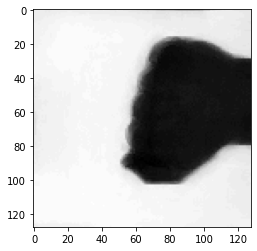

In [973]:
proof_image = trainImages[image_number]
plt.imshow(proof_image, cmap="gray")
print(trainLabels[image_number])

Se utiliza el método de segmentación OTSU, para encontrar el umbral de manera automática y lograr una segmentación óptima:

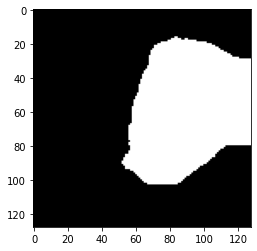

In [974]:
_, otsu = cv2.threshold(proof_image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
plt.imshow(otsu, cmap="gray")

Se observa que con este procedimiento, se logra una segmentación bastante adecuada para esta imagen. Se utilizará este procedimiento para todas las imágenes de los diferentes datasets: entrenamiento, validación y testeo:

In [975]:
images = []
# Llamar cada una de las imágenes del dataset de entrenamiento
for image in trainImages:
    # Utilizar OTSU
    _, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    images.append(otsu)
trainImages = np.array(images)

Tenemos finalmente un array de 1531 imágenes de entrenamiento, suavizadas mediante el filtro medianBlur, con un tamaño de 128 * 128 pixeles cada una, segmentadas mediante OTSU, para el canal H del espacio HSV:

In [976]:
trainImages.shape

(1531, 128, 128)

### Validation dataset

In [977]:
images = []
# Llamar cada una de las imágenes del dataset de Validación
for image in validationImages:
    # Utilizar OTSU
    _, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    images.append(otsu)
validationImages = np.array(images)

In [978]:
validationImages.shape

(437, 128, 128)

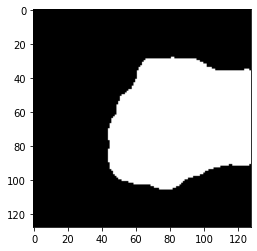

In [979]:
plt.imshow(trainImages[0], cmap="gray")

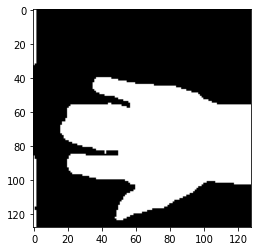

In [980]:
plt.imshow(validationImages[0], cmap="gray")

### Test dataset

In [981]:
images = []
# Llamar cada una de las imágenes del dataset de testeo
for image in testImages:
    # Utilizar OTSU
    _, otsu = cv2.threshold(image, 0, 255, cv2.THRESH_BINARY_INV+cv2.THRESH_OTSU)
    images.append(otsu)
testImages = np.array(images)

In [982]:
testImages.shape

(220, 128, 128)

## **6. Extracción de características**

Nos centraremos en el uso de descriptores de forma y topología:

In [983]:
from skimage.measure import label, regionprops

### **Características de forma**

In [984]:
#función de características de forma

def get_features_area(props, features):
    features['y_centroid'], features['x_centroid'] = props.local_centroid
    features['perimeter'] = props.perimeter
    features['area'] = props.area
    features['area_to_convex_ratio'] = props.area/props.convex_area
    features['compacity'] = props.perimeter**2/props.area
    features['area2_perimeter'] = props.area**2/props.perimeter
    features['area2'] = props.area**2
    features['perimeter2'] = props.perimeter**2
    if (props.minor_axis_length == 0 or props.major_axis_length == 0):
        features['mayor_menor'] = np.nan
        features['menor_mayor'] = np.nan
    else:
        features['mayor_menor'] = props.major_axis_length/props.minor_axis_length
        features['menor_mayor'] = props.minor_axis_length/props.major_axis_length
    features['area_perimeter_ratio'] = props.area / props.perimeter
    return features

### Uniendo lo anterior
Combinamos lo anterior en una sola función get_features: esta función devuelve un diccionario de features con las características extraidas de una imagen del conjunto de datos.

In [985]:
#función que extrae características de una imagen
def get_features(index, image_number):
    features = {}
    datasets = [trainImages, validationImages, testImages]
    img = datasets[index][image_number]
    label_img = label(img)
    props = regionprops(label_img)[0]
    features = get_features_area(props, features)
    return features

In [986]:
features_0 = get_features(0,0)
columns = [k  for  k in  features_0.keys()]
columns.append('class')

#crear dataset de características de entrenamiento como dataframe de pandas
df_train = pd.DataFrame(columns=columns)

#extraer características de todas las imágenes de entrenamiento 
for i in range(len(trainImages)):
    features = get_features(0,i)
    df_train.loc[i] = [features[feature] for feature in features.keys()]+[trainLabels[i]]

<ipython-input-984-11851b608b60>:9: RuntimeWarning: divide by zero encountered in true_divide
  features['area2_perimeter'] = props.area**2/props.perimeter
<ipython-input-984-11851b608b60>:18: RuntimeWarning: divide by zero encountered in true_divide
  features['area_perimeter_ratio'] = props.area / props.perimeter


In [987]:
#leer el set como un dataframe de pandas
df_train

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  \
0      38.391279   42.112259  290.267027  5229              0.945399   
1      37.793922   37.220497  268.610173  4508              0.961604   
2      40.213055   45.931550  288.787843  4412              0.922048   
3      44.417669   41.094656  278.551299  5071              0.977260   
4      32.715691   56.586651  375.338095  4270              0.762772   
...          ...         ...         ...   ...                   ...   
1526   61.183191   49.464096  333.137085  4902              0.830285   
1527   40.840452   63.664608  372.450793  7609              0.938919   
1528   41.137652   54.980027  360.592929  3705              0.772358   
1529   34.654954   48.509408  274.994949  4411              0.946160   
1530   44.738115   49.992556  342.350288  5911              0.888338   

      compacity  area2_perimeter     area2     perimeter2  mayor_menor  \
0     16.113013     94197.543737  27342441   84254.947140     1.250137   
1     16.005196     75656.345286  20322064   72151.425069     1.158107   
2     18.902633     67404.998167  19465744   83398.418025     1.332975   
3     15.300893     92317.074570  25715041   77590.825925     1.171803   
4     32.992666     48577.270033  18232900  140878.685646     1.579926   
...         ...              ...       ...            ...          ...   
1526  22.639804     72131.278932  24029604  110980.317396     1.129572   
1527  18.230989    155448.402882  57896881  138719.593570     1.521220   
1528  35.095077     38067.926162  13727025  130027.260526     1.929502   
1529  17.144009     70753.739459  19456921   75622.222177     1.523774   
1530  19.828070    102058.979301  34939921  117203.719985     1.723172   

      menor_mayor  area_perimeter_ratio     class  
0        0.799913             18.014447      rock  
1        0.863478             16.782685      rock  
2        0.750202             15.277651     paper  
3        0.853386             18.204905      rock  
4        0.632941             11.376410  scissors  
...           ...                   ...       ...  
1526     0.885291             14.714663     paper  
1527     0.657367             20.429544     paper  
1528     0.518268             10.274744  scissors  
1529     0.656266             16.040295     paper  
1530     0.580325             17.265941      rock  

[1531 rows x 13 columns]

In [989]:
df_train.dropna(inplace=True)
df_train

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  \
0      38.391279   42.112259  290.267027  5229              0.945399   
1      37.793922   37.220497  268.610173  4508              0.961604   
2      40.213055   45.931550  288.787843  4412              0.922048   
3      44.417669   41.094656  278.551299  5071              0.977260   
4      32.715691   56.586651  375.338095  4270              0.762772   
...          ...         ...         ...   ...                   ...   
1526   61.183191   49.464096  333.137085  4902              0.830285   
1527   40.840452   63.664608  372.450793  7609              0.938919   
1528   41.137652   54.980027  360.592929  3705              0.772358   
1529   34.654954   48.509408  274.994949  4411              0.946160   
1530   44.738115   49.992556  342.350288  5911              0.888338   

      compacity  area2_perimeter     area2     perimeter2  mayor_menor  \
0     16.113013     94197.543737  27342441   84254.947140     1.250137   
1     16.005196     75656.345286  20322064   72151.425069     1.158107   
2     18.902633     67404.998167  19465744   83398.418025     1.332975   
3     15.300893     92317.074570  25715041   77590.825925     1.171803   
4     32.992666     48577.270033  18232900  140878.685646     1.579926   
...         ...              ...       ...            ...          ...   
1526  22.639804     72131.278932  24029604  110980.317396     1.129572   
1527  18.230989    155448.402882  57896881  138719.593570     1.521220   
1528  35.095077     38067.926162  13727025  130027.260526     1.929502   
1529  17.144009     70753.739459  19456921   75622.222177     1.523774   
1530  19.828070    102058.979301  34939921  117203.719985     1.723172   

      menor_mayor  area_perimeter_ratio     class  
0        0.799913             18.014447      rock  
1        0.863478             16.782685      rock  
2        0.750202             15.277651     paper  
3        0.853386             18.204905      rock  
4        0.632941             11.376410  scissors  
...           ...                   ...       ...  
1526     0.885291             14.714663     paper  
1527     0.657367             20.429544     paper  
1528     0.518268             10.274744  scissors  
1529     0.656266             16.040295     paper  
1530     0.580325             17.265941      rock  

[1482 rows x 13 columns]

In [990]:
X_train = df_train.loc[:, df_train.columns != 'class']
X_train.head()

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  compacity  \
0   38.391279   42.112259  290.267027  5229              0.945399  16.113013   
1   37.793922   37.220497  268.610173  4508              0.961604  16.005196   
2   40.213055   45.931550  288.787843  4412              0.922048  18.902633   
3   44.417669   41.094656  278.551299  5071              0.977260  15.300893   
4   32.715691   56.586651  375.338095  4270              0.762772  32.992666   

   area2_perimeter     area2     perimeter2  mayor_menor  menor_mayor  \
0     94197.543737  27342441   84254.947140     1.250137     0.799913   
1     75656.345286  20322064   72151.425069     1.158107     0.863478   
2     67404.998167  19465744   83398.418025     1.332975     0.750202   
3     92317.074570  25715041   77590.825925     1.171803     0.853386   
4     48577.270033  18232900  140878.685646     1.579926     0.632941   

   area_perimeter_ratio  
0             18.014447  
1             16.782685  
2             15.277651  
3             18.204905  
4             11.376410

In [991]:
Y_train = df_train[['class']]
Y_train.head()

class
0      rock
1      rock
2     paper
3      rock
4  scissors

### Validation Dataset

In [992]:
features_1 = get_features(1,0)
columns = [k  for  k in  features_1.keys()]
columns.append('class')

#crear dataset de características de entrenamiento como dataframe de pandas
df_val = pd.DataFrame(columns=columns)

#extraer características de todas las imágenes de validación
for i in range(len(validationImages)):
    features = get_features(1, i)
    df_val.loc[i] = [features[feature] for feature in features.keys()]+[validationLabels[i]]

<ipython-input-984-11851b608b60>:9: RuntimeWarning: divide by zero encountered in true_divide
  features['area2_perimeter'] = props.area**2/props.perimeter
<ipython-input-984-11851b608b60>:18: RuntimeWarning: divide by zero encountered in true_divide
  features['area_perimeter_ratio'] = props.area / props.perimeter


In [993]:
df_val.dropna(inplace=True)
df_val

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  \
0     15.753846    0.492308   65.207107    65              1.000000   
1     31.890103   60.213776  375.279221  4486              0.745678   
2     41.478206   40.732543  282.551299  4726              0.925397   
3     43.687400   43.928828  286.793939  5016              0.935297   
4     36.976473   58.103358  395.314755  4973              0.798747   
..          ...         ...         ...   ...                   ...   
432   39.821027   55.751965  328.166522  6487              0.954111   
433   45.903444   34.758504  280.409163  4733              0.946032   
434   39.201700   36.520723  276.852814  4705              0.950889   
435   35.025110   64.326430  416.350288  5456              0.786507   
436   37.880555   29.589301  244.166522  3533              0.947185   

     compacity  area2_perimeter     area2     perimeter2  mayor_menor  \
0    65.414873        64.793551      4225    4251.966775    18.777245   
1    31.394225     53624.594421  20124196  140834.493424     1.447141   
2    16.892771     79047.861802  22335076   79835.236314     1.161221   
3    16.397680     87729.385310  25160256   82250.763584     1.168895   
4    31.424443     62559.590092  24730729  156273.755141     1.498259   
..         ...              ...       ...            ...          ...   
432  16.601398    128231.145312  42081169  107693.266320     1.240213   
433  16.612994     79887.863742  22401289   78629.298654     1.364308   
434  16.290644     79959.544932  22137025   76647.480477     1.411148   
435  31.771914     71497.334883  29767936  173347.562672     1.654130   
436  16.874410     51121.213856  12482089   59617.290583     1.450969   

     menor_mayor  area_perimeter_ratio     class  
0       0.053256              0.996824     paper  
1       0.691018             11.953766  scissors  
2       0.861162             16.726166      rock  
3       0.855509             17.489909      rock  
4       0.667441             12.579849  scissors  
..           ...                   ...       ...  
432     0.806313             19.767403     paper  
433     0.732972             16.878906      rock  
434     0.708643             16.994590      rock  
435     0.604547             13.104350  scissors  
436     0.689195             14.469633      rock  

[420 rows x 13 columns]

In [994]:
X_val = df_val.loc[:, df_val.columns != 'class']
X_val.head()

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  compacity  \
0   15.753846    0.492308   65.207107    65              1.000000  65.414873   
1   31.890103   60.213776  375.279221  4486              0.745678  31.394225   
2   41.478206   40.732543  282.551299  4726              0.925397  16.892771   
3   43.687400   43.928828  286.793939  5016              0.935297  16.397680   
4   36.976473   58.103358  395.314755  4973              0.798747  31.424443   

   area2_perimeter     area2     perimeter2  mayor_menor  menor_mayor  \
0        64.793551      4225    4251.966775    18.777245     0.053256   
1     53624.594421  20124196  140834.493424     1.447141     0.691018   
2     79047.861802  22335076   79835.236314     1.161221     0.861162   
3     87729.385310  25160256   82250.763584     1.168895     0.855509   
4     62559.590092  24730729  156273.755141     1.498259     0.667441   

   area_perimeter_ratio  
0              0.996824  
1             11.953766  
2             16.726166  
3             17.489909  
4             12.579849

In [995]:
Y_val = df_val[['class']]
Y_val.head()

class
0     paper
1  scissors
2      rock
3      rock
4  scissors

### Test Dataset

In [996]:
features_2 = get_features(2, 0)
columns = [k  for  k in  features_2.keys()]
columns.append('class')

#crear dataset de características de entrenamiento como dataframe de pandas
df_test = pd.DataFrame(columns=columns)

#extraer características de todas las imágenes de entrenamiento 
for i in range(len(testImages)):
    features = get_features(2, i)
    df_test.loc[i] = [features[feature] for feature in features.keys()]+[testLabels[i]]

<ipython-input-984-11851b608b60>:9: RuntimeWarning: divide by zero encountered in true_divide
  features['area2_perimeter'] = props.area**2/props.perimeter
<ipython-input-984-11851b608b60>:18: RuntimeWarning: divide by zero encountered in true_divide
  features['area_perimeter_ratio'] = props.area / props.perimeter


In [997]:
df_test

y_centroid  x_centroid   perimeter   area  area_to_convex_ratio  \
0     39.510249   47.503627  337.965512   3171              0.687703   
1     42.131659   42.920769  318.409163   5932              0.934762   
2     37.562364   57.127998  375.480231   4586              0.786621   
3     16.196721    0.459016   59.000000     61              0.968254   
4     34.076749   54.001354  367.580736   4430              0.800940   
..          ...         ...         ...    ...                   ...   
215   35.612946   64.089937  415.557395   5237              0.761856   
216   32.686699   44.669005  301.651804   3278              0.820937   
217   64.982111   54.930615  593.338095  13807              0.842712   
218   38.843960   62.617636  362.509668   5364              0.886319   
219   40.328078   49.489263  356.450793   3679              0.723074   

     compacity  area2_perimeter      area2     perimeter2  mayor_menor  \
0    36.020400     29752.269506   10055241  114220.687379     1.409798   
1    17.091098    110513.854804   35188624  101384.395037     1.156912   
2    30.742565     56011.992851   21031396  140985.403677     1.531473   
3    57.065574        63.067797       3721    3481.000000    17.946073   
4    30.500135     53389.359366   19624900  135115.597334     1.412193   
..         ...              ...        ...            ...          ...   
215  32.974594     65998.510233   27426169  172687.948711     1.718460   
216  27.758942     35621.481029   10745284   90993.810625     1.854837   
217  25.497943    321289.414196  190633249  352050.095117     1.177675   
218  24.499116     79370.285928   28772496  131413.259388     1.635831   
219  34.535789     37971.695525   13535041  127057.168179     1.446119   

     menor_mayor  area_perimeter_ratio     class  
0       0.709321              9.382614  scissors  
1       0.864370             18.630117      rock  
2       0.652966             12.213692  scissors  
3       0.055722              1.033898     paper  
4       0.708118             12.051774  scissors  
..           ...                   ...       ...  
215     0.581916             12.602351  scissors  
216     0.539131             10.866834     paper  
217     0.849131             23.270038     paper  
218     0.611310             14.796847  scissors  
219     0.691506             10.321200  scissors  

[220 rows x 13 columns]

In [998]:
df_test.dropna(inplace=True)
df_test

y_centroid  x_centroid   perimeter   area  area_to_convex_ratio  \
0     39.510249   47.503627  337.965512   3171              0.687703   
1     42.131659   42.920769  318.409163   5932              0.934762   
2     37.562364   57.127998  375.480231   4586              0.786621   
3     16.196721    0.459016   59.000000     61              0.968254   
4     34.076749   54.001354  367.580736   4430              0.800940   
..          ...         ...         ...    ...                   ...   
215   35.612946   64.089937  415.557395   5237              0.761856   
216   32.686699   44.669005  301.651804   3278              0.820937   
217   64.982111   54.930615  593.338095  13807              0.842712   
218   38.843960   62.617636  362.509668   5364              0.886319   
219   40.328078   49.489263  356.450793   3679              0.723074   

     compacity  area2_perimeter      area2     perimeter2  mayor_menor  \
0    36.020400     29752.269506   10055241  114220.687379     1.409798   
1    17.091098    110513.854804   35188624  101384.395037     1.156912   
2    30.742565     56011.992851   21031396  140985.403677     1.531473   
3    57.065574        63.067797       3721    3481.000000    17.946073   
4    30.500135     53389.359366   19624900  135115.597334     1.412193   
..         ...              ...        ...            ...          ...   
215  32.974594     65998.510233   27426169  172687.948711     1.718460   
216  27.758942     35621.481029   10745284   90993.810625     1.854837   
217  25.497943    321289.414196  190633249  352050.095117     1.177675   
218  24.499116     79370.285928   28772496  131413.259388     1.635831   
219  34.535789     37971.695525   13535041  127057.168179     1.446119   

     menor_mayor  area_perimeter_ratio     class  
0       0.709321              9.382614  scissors  
1       0.864370             18.630117      rock  
2       0.652966             12.213692  scissors  
3       0.055722              1.033898     paper  
4       0.708118             12.051774  scissors  
..           ...                   ...       ...  
215     0.581916             12.602351  scissors  
216     0.539131             10.866834     paper  
217     0.849131             23.270038     paper  
218     0.611310             14.796847  scissors  
219     0.691506             10.321200  scissors  

[212 rows x 13 columns]

In [999]:
X_test = df_test.loc[:, df_test.columns != 'class']
X_test.head()

y_centroid  x_centroid   perimeter  area  area_to_convex_ratio  compacity  \
0   39.510249   47.503627  337.965512  3171              0.687703  36.020400   
1   42.131659   42.920769  318.409163  5932              0.934762  17.091098   
2   37.562364   57.127998  375.480231  4586              0.786621  30.742565   
3   16.196721    0.459016   59.000000    61              0.968254  57.065574   
4   34.076749   54.001354  367.580736  4430              0.800940  30.500135   

   area2_perimeter     area2     perimeter2  mayor_menor  menor_mayor  \
0     29752.269506  10055241  114220.687379     1.409798     0.709321   
1    110513.854804  35188624  101384.395037     1.156912     0.864370   
2     56011.992851  21031396  140985.403677     1.531473     0.652966   
3        63.067797      3721    3481.000000    17.946073     0.055722   
4     53389.359366  19624900  135115.597334     1.412193     0.708118   

   area_perimeter_ratio  
0              9.382614  
1             18.630117  
2             12.213692  
3              1.033898  
4             12.051774

In [1000]:
Y_test = df_test[['class']]
Y_test.head()

class
0  scissors
1      rock
2  scissors
3     paper
4  scissors

## **7. Reconocimiento de patrones**
Se plantean 3 modelos de aprendizaje de máquinas, sobre los cuales se hace un ajuste de hiperparámetros individualmente, con base en los datos de testeo. Al final de cada modelo, se presentan las métricas al evaluar los datos del subconjunto de validación.

In [1001]:
features = (X_train.columns).tolist()
features

['y_centroid',
 'x_centroid',
 'perimeter',
 'area',
 'area_to_convex_ratio',
 'compacity',
 'area2_perimeter',
 'area2',
 'perimeter2',
 'mayor_menor',
 'menor_mayor',
 'area_perimeter_ratio']

In [1002]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_train = pd.DataFrame(X_train)
X_train.columns = features
X_train.head()

y_centroid  x_centroid  perimeter      area  area_to_convex_ratio  \
0   -0.113671   -0.572989  -0.646776  0.093050              0.887891   
1   -0.191226   -0.956741  -0.915982 -0.367971              1.071409   
2    0.122847   -0.273371  -0.665163 -0.429355              0.623459   
3    0.668727   -0.652819  -0.792409 -0.007978              1.248698   
4   -0.850526    0.562506   0.410702 -0.520152             -1.180246   

   compacity  area2_perimeter     area2  perimeter2  mayor_menor  menor_mayor  \
0  -0.925443         0.373359 -0.049479   -0.706137    -0.234803     0.908256   
1  -0.936372        -0.093760 -0.417000   -0.923142    -0.275098     1.396871   
2  -0.642669        -0.301641 -0.461829   -0.721493    -0.198531     0.526136   
3  -1.007764         0.325984 -0.134675   -0.825618    -0.269102     1.319297   
4   0.785586        -0.775980 -0.526369    0.309077    -0.090402    -0.375226   

   area_perimeter_ratio  
0              0.875585  
1              0.547799  
2              0.147293  
3              0.926268  
4             -0.890871

In [1003]:
scaler = StandardScaler()
X_val = scaler.fit_transform(X_val)
X_val = pd.DataFrame(X_val)
X_val.columns = features
X_val.head()

y_centroid  x_centroid  perimeter      area  area_to_convex_ratio  \
0   -3.435245   -4.011638  -3.565057 -3.328793              1.513141   
1   -1.113496    0.783904   0.345836 -0.469806             -1.399646   
2    0.266079   -0.780409  -0.823728 -0.314602              0.658695   
3    0.583947   -0.523752  -0.770216 -0.127064              0.772092   
4   -0.381648    0.614441   0.598541 -0.154871             -0.791839   

   compacity  area2_perimeter     area2  perimeter2  mayor_menor  menor_mayor  \
0   4.055089        -2.053786 -1.465570   -2.159039     7.205151    -4.966944   
1   0.609053        -0.710346 -0.467930    0.237626    -0.147713     0.076099   
2  -0.859835        -0.072654 -0.358305   -0.832751    -0.269024     1.421501   
3  -0.909984         0.145104 -0.218219   -0.790364    -0.265768     1.376797   
4   0.612114        -0.486229 -0.239517    0.508545    -0.126024    -0.110330   

   area_perimeter_ratio  
0             -3.817767  
1             -0.812908  
2              0.495886  
3              0.705337  
4             -0.641210

In [1004]:
X_test = scaler.fit_transform(X_test)
X_test = pd.DataFrame(X_test)
X_test.columns = features
X_test.head()

y_centroid  x_centroid  perimeter      area  area_to_convex_ratio  \
0    0.023121   -0.161820  -0.101595 -1.021644             -1.952417   
1    0.350317   -0.506364  -0.317695  0.341989              0.801840   
2   -0.220007    0.561752   0.312948 -0.322788             -0.849665   
3   -2.886795   -3.698687  -3.184203 -2.557646              1.175214   
4   -0.655070    0.326687   0.225657 -0.399835             -0.690031   

   compacity  area2_perimeter     area2  perimeter2  mayor_menor  menor_mayor  \
0   1.065280        -0.994330 -0.702055   -0.222602    -0.177730     0.197806   
1  -0.854889         0.493589  0.118746   -0.419817    -0.275189     1.306941   
2   0.529902        -0.510532 -0.343598    0.188607    -0.130838    -0.205330   
3   3.200081        -1.541313 -1.030315   -1.923990     6.195155    -4.477693   
4   0.505310        -0.558850 -0.389531    0.098424    -0.176807     0.189200   

   area_perimeter_ratio  
0             -1.343302  
1              0.961133  
2             -0.637810  
3             -3.423763  
4             -0.678159

In [1005]:
from sklearn.decomposition import PCA
train_pca = PCA(n_components=2)
train_pca_result = train_pca.fit_transform(X_train)
train_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

train_pca_df['pca1'] = train_pca_result[:,0]
train_pca_df['pca2'] = train_pca_result[:,1]

train_pca_df.head(5)

pca1      pca2
0  0.203561 -1.952380
1 -0.531026 -2.054657
2 -0.601477 -1.138808
3  0.357519 -2.261774
4 -0.937524  1.892161

In [1006]:
val_pca = PCA(n_components=2)
val_pca_result = val_pca.fit_transform(X_val)
val_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

val_pca_df['pca1'] = val_pca_result[:,0]
val_pca_df['pca2'] = val_pca_result[:,1]

val_pca_df.head(5)

pca1      pca2
0 -11.504781  0.487161
1  -0.747453  1.836678
2  -0.232960 -1.735147
3   0.215389 -1.851827
4  -0.171231  1.588394

In [1007]:
test_pca = PCA(n_components=2)
test_pca_result = test_pca.fit_transform(X_test)
test_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

test_pca_df['pca1'] = test_pca_result[:,0]
test_pca_df['pca2'] = test_pca_result[:,1]

test_pca_df.head(5)

pca1      pca2
0 -1.453653  2.138735
1  0.856373 -1.806862
2 -0.409164  1.368231
3 -9.667814  0.973556
4 -0.627986  1.158358

In [1008]:
train_num_class = []

for e in Y_train['class'].values:
    if (e == 'rock'):
        train_num_class.append(0)
    elif (e == 'paper'):
        train_num_class.append(1)
    elif (e == 'scissors'):
        train_num_class.append(2)

In [1009]:
val_num_class = []

for e in Y_val['class'].values:
    if (e == 'rock'):
        val_num_class.append(0)
    elif (e == 'paper'):
        val_num_class.append(1)
    elif (e == 'scissors'):
        val_num_class.append(2)

In [1010]:
test_num_class = []

for e in Y_test['class'].values:
    if (e == 'rock'):
        test_num_class.append(0)
    elif (e == 'paper'):
        test_num_class.append(1)
    elif (e == 'scissors'):
        test_num_class.append(2)

Text(0, 0.5, 'Principal Component 2')

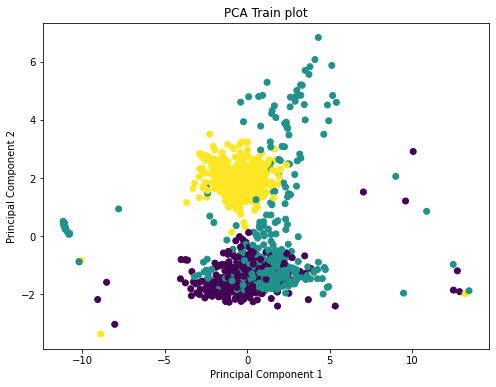

In [1011]:
plt.figure(figsize=(8,6))
plt.scatter(train_pca_df.values[:,0], train_pca_df.values[:,1], c = train_num_class)

plt.title("PCA Train plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

Text(0, 0.5, 'Principal Component 2')

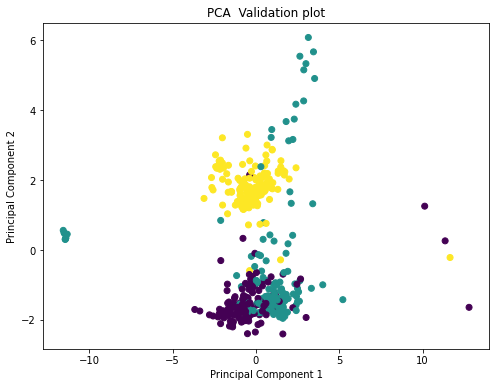

In [1012]:
plt.figure(figsize=(8,6))
plt.scatter(val_pca_df.values[:,0], val_pca_df.values[:,1], c = val_num_class)

plt.title("PCA  Validation plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

Text(0, 0.5, 'Principal Component 2')

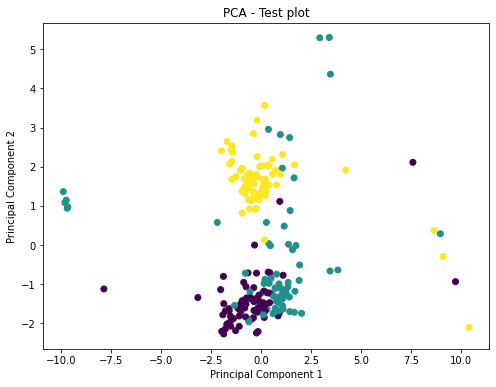

In [1013]:
plt.figure(figsize=(8,6))
plt.scatter(test_pca_df.values[:,0], test_pca_df.values[:,1], c = test_num_class)

plt.title("PCA - Test plot")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")

Comparemos las diferentes características para ver si alguna o alguna combinación de ellas logra separar las clases de una manera más clara:

In [1014]:
features

['y_centroid',
 'x_centroid',
 'perimeter',
 'area',
 'area_to_convex_ratio',
 'compacity',
 'area2_perimeter',
 'area2',
 'perimeter2',
 'mayor_menor',
 'menor_mayor',
 'area_perimeter_ratio']

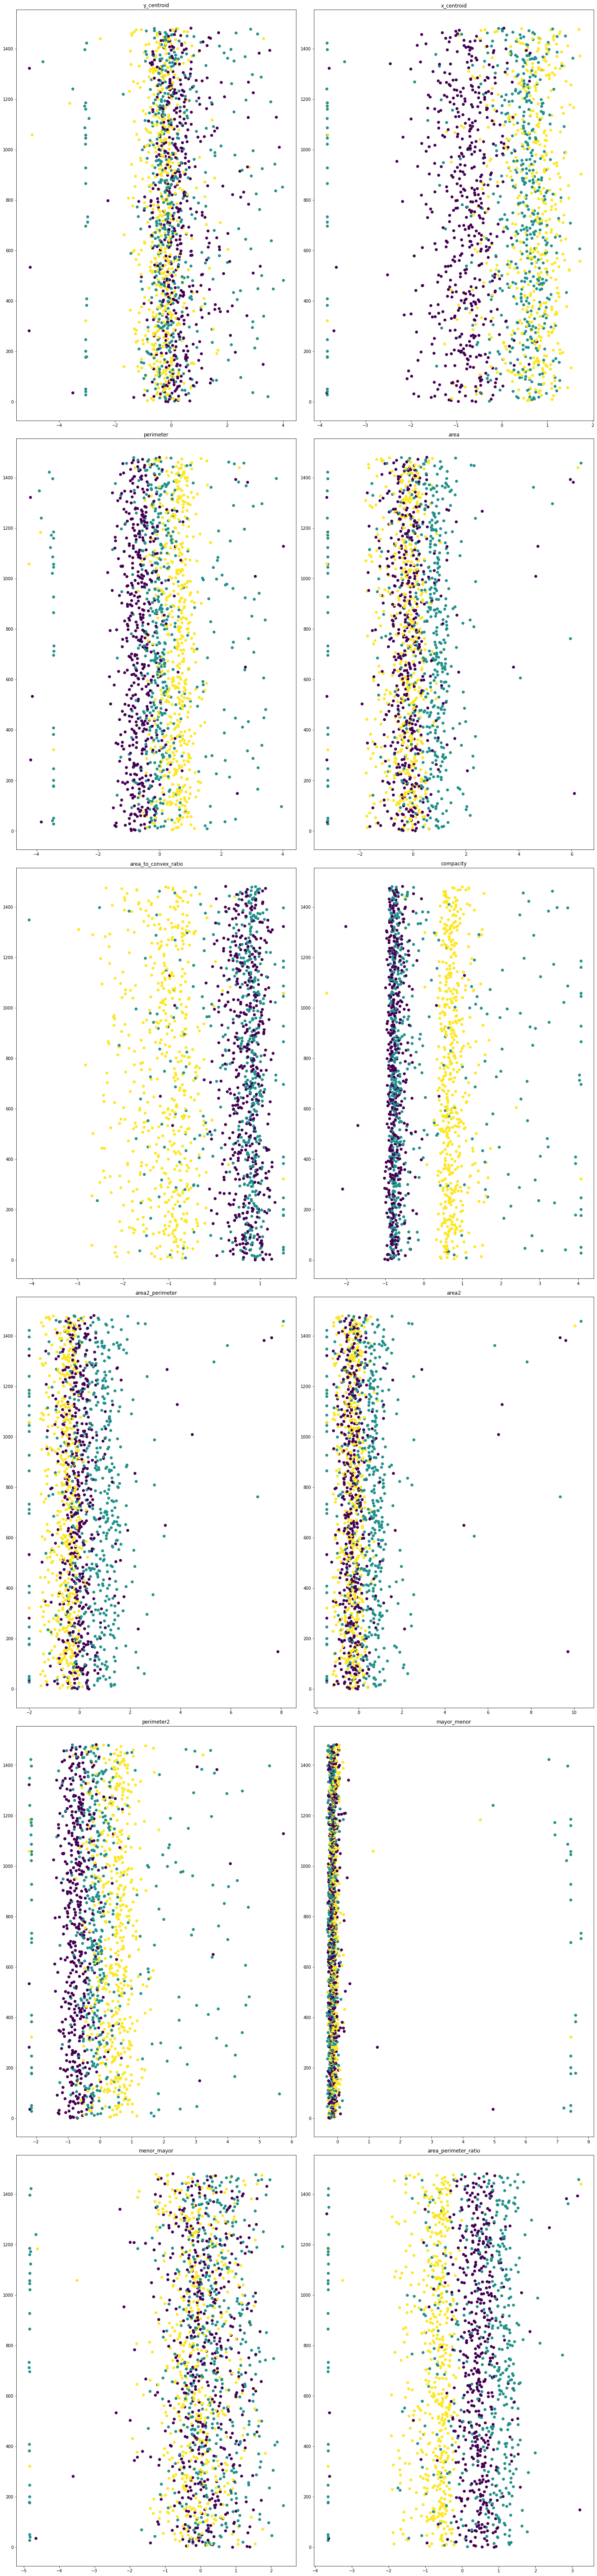

In [1015]:
fig1 = plt.figure(1,figsize=(20, 100))
cols = 2
rows = (len(features)//2)+1

for i, feature in enumerate(features):
    fig1.add_subplot(rows, cols, i+1)
    plt.title(feature)
    plt.scatter(X_train[feature].values, np.arange(0, len(X_train)), c = train_num_class)

plt.tight_layout()

In [1016]:
prueba_train = pd.DataFrame(X_train[['x_centroid','area_perimeter_ratio']])
prueba_train.head(5)

x_centroid  area_perimeter_ratio
0   -0.572989              0.875585
1   -0.956741              0.547799
2   -0.273371              0.147293
3   -0.652819              0.926268
4    0.562506             -0.890871

In [349]:
prueba_train_pca = PCA(n_components=2)
prueba_train_pca_result = prueba_train_pca.fit_transform(prueba_train)
prueba_train_pca_df = pd.DataFrame(columns = ['pca1','pca2'])

prueba_train_pca_df['pca1'] = prueba_train_pca_result[:,0]
prueba_train_pca_df['pca2'] = prueba_train_pca_result[:,1]
varianza=(prueba_train_pca.explained_variance_ratio_)*100


print('Porcentaje de los datos explicados por cada componente principal: {}'.format(varianza))
print('Porcentaje total de los datos explicados por las componentes principales: ' + repr(sum(varianza)))
print('Porcentaje de información perdida: ' + repr(100-sum(varianza)))
prueba_train_pca_df.head(5)

Porcentaje de los datos explicados por cada componente principal: [52.19799482 47.80200518]
Porcentaje total de los datos explicados por las componentes principales: 100.00000000000001
Porcentaje de información perdida: -1.4210854715202004e-14


pca1      pca2
0 -1.279961 -0.358729
1  1.143550 -0.640036
2  0.083007 -0.119239
3 -0.484766 -0.164778
4 -1.175070  0.290623

Text(0, 0.5, 'area_perimeter_ratio')

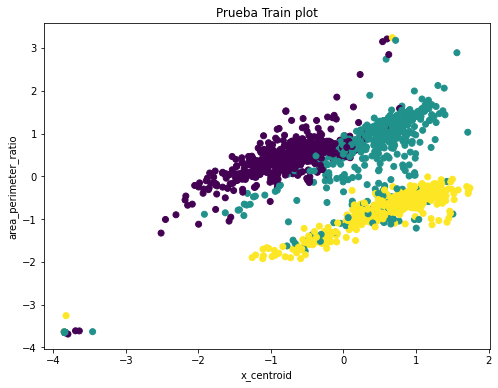

In [1017]:
plt.figure(figsize=(8,6))
plt.scatter(prueba_train.values[:,0], prueba_train.values[:,1], c = train_num_class)

plt.title("Prueba Train plot")
plt.xlabel(prueba_train.columns[0])
plt.ylabel(prueba_train.columns[1])

In [1018]:
def show_pred(preds, idxs):
    plt.figure(figsize=(30, 20))
    plt.suptitle("Predictions", fontsize=40)
    diff_s = math.sqrt(idxs[1] - idxs[0])
    for img_idx in range(idxs[0], idxs[1]):
        plt.subplot(diff_s, diff_s, img_idx + 1)
        plt.title(f"Pred: {preds[img_idx]}")
        plt.imshow(validationImages[img_idx], cmap="gray")
    plt.show()

In [1019]:
prueba_val = pd.DataFrame(X_val[['x_centroid', 'area_perimeter_ratio']])
prueba_val.head(5)

x_centroid  area_perimeter_ratio
0   -4.011638             -3.817767
1    0.783904             -0.812908
2   -0.780409              0.495886
3   -0.523752              0.705337
4    0.614441             -0.641210

Text(0, 0.5, 'area_perimeter_ratio')

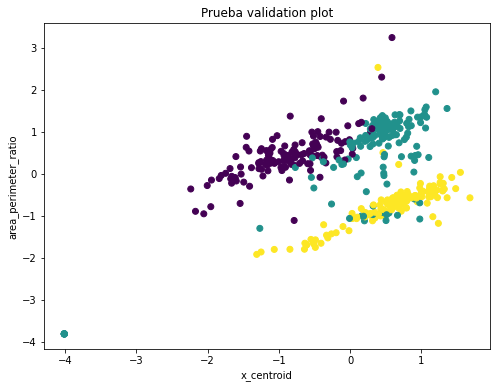

In [1021]:
plt.figure(figsize=(8,6))
plt.scatter(prueba_val.values[:,0], prueba_val.values[:,1], c = val_num_class)

plt.title("Prueba validation plot")
plt.xlabel(prueba_val.columns[0])
plt.ylabel(prueba_val.columns[1])

### KNN

In [1022]:
# Usando conjunto con caracteristicas aplanadas
knn_model = KNeighborsClassifier(n_jobs=-1)
knn_model.fit(prueba_train, Y_train)
acc = knn_model.score(prueba_val.values, Y_val.values.ravel())
print("Precisión del modelo KNN: {:.2f}%".format(acc * 100))

Precisión del modelo KNN: 90.71%


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:179: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [1023]:
pred_knn = knn_model.predict(prueba_val)

In [1024]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

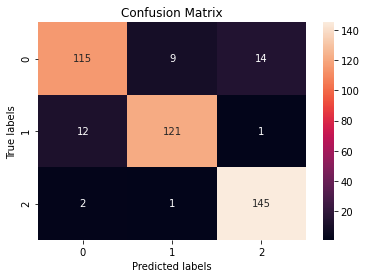

In [1025]:
import seaborn as sns  
cm = confusion_matrix(Y_val.values.ravel(), knn_model.predict(prueba_val))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['grape', 'strawberry']); ax.yaxis.set_ticklabels(['grape', 'strawberry']);

<ipython-input-1018-1a324d051813>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


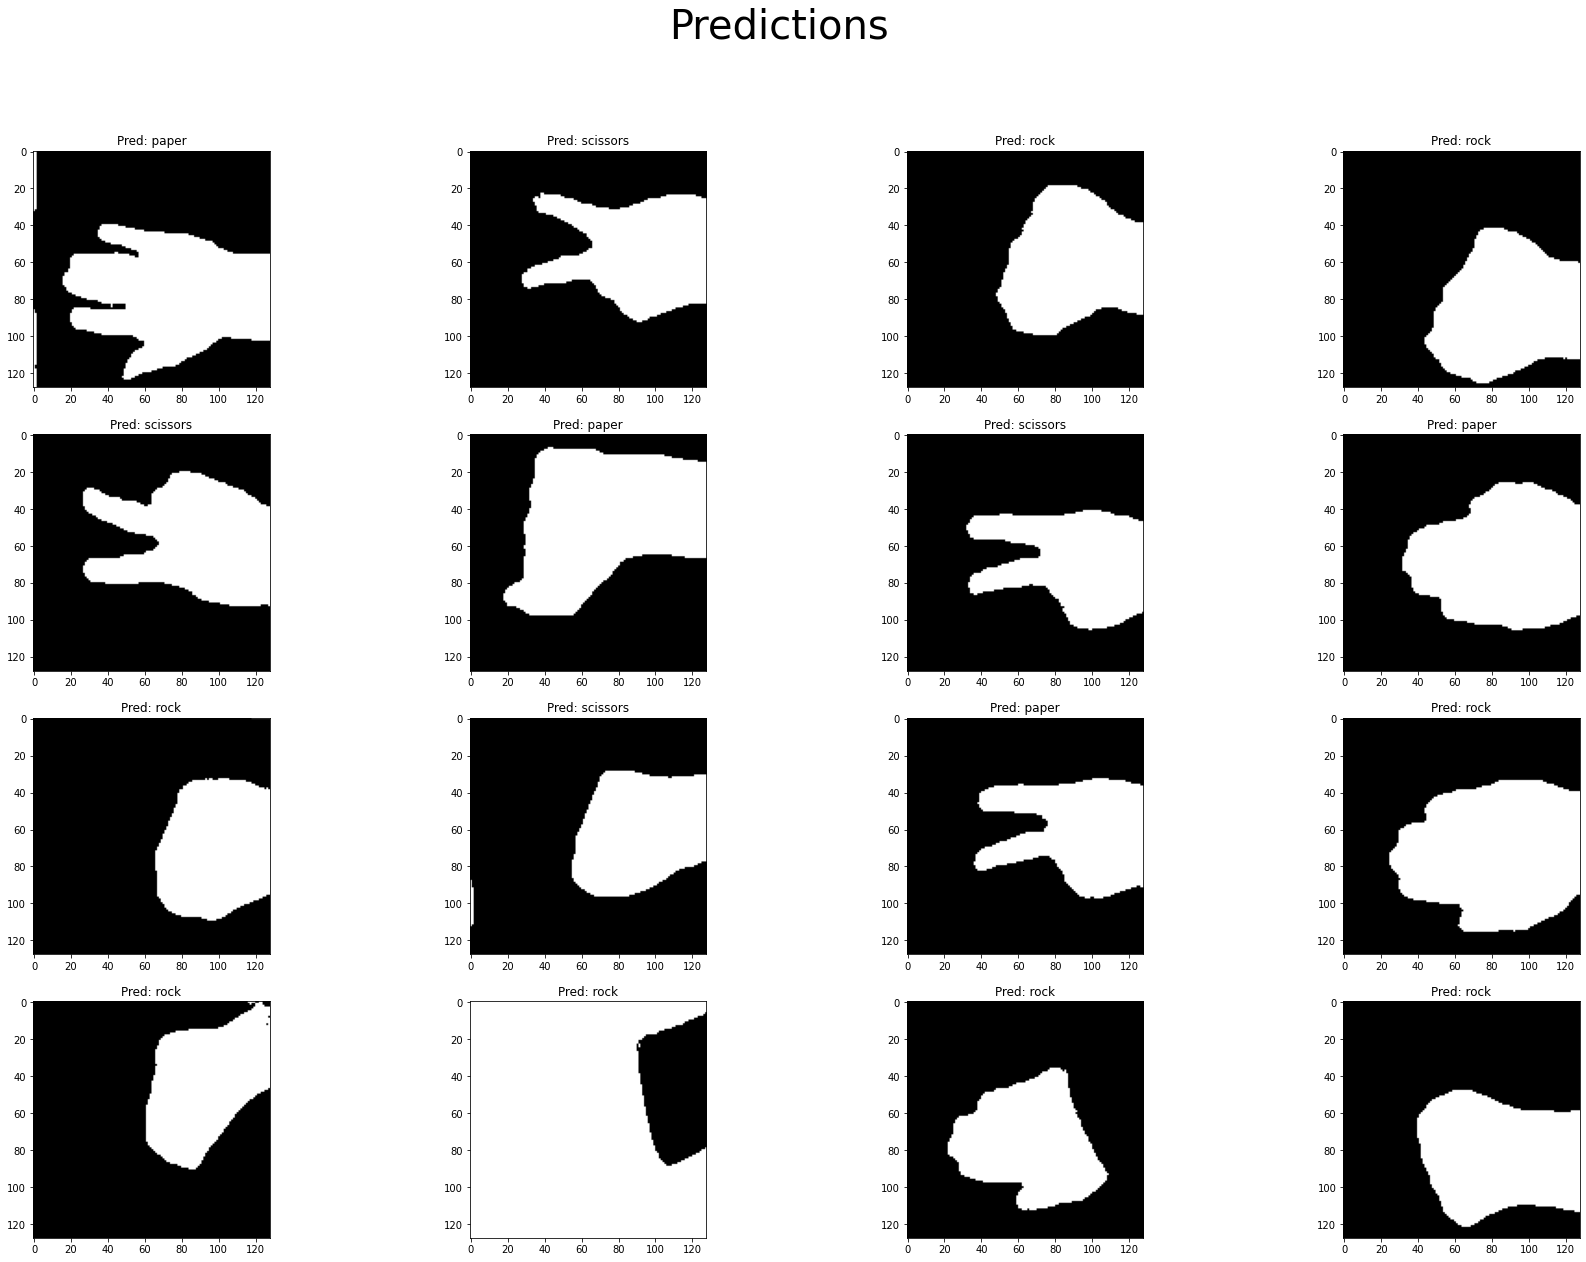

In [1026]:
show_pred(pred_knn, (0, 16))

### Random Forest

In [1027]:
from sklearn.ensemble import RandomForestClassifier
# Creamos el arbol aleatorio
random_forest_model_0 = RandomForestClassifier(n_estimators = 210, random_state = SEED)
random_forest_model_0.fit(prueba_train, Y_train)

# Calculamos el score
acc = random_forest_model_0.score(prueba_val, Y_val)
print("Precisión del modelo: {:.2f}%".format(acc * 100))

<ipython-input-1027-8b5a0f563c01>:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  random_forest_model_0.fit(prueba_train, Y_train)


Precisión del modelo: 92.38%


In [1028]:
pred_forest = random_forest_model_0.predict(prueba_val)

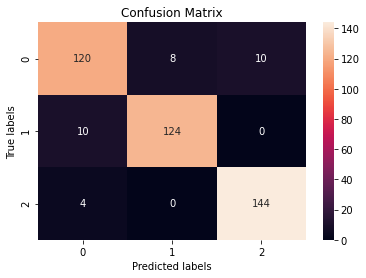

In [1029]:
import seaborn as sns  
cm = confusion_matrix(Y_val.values.ravel(), random_forest_model_0.predict(prueba_val))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['grape', 'strawberry']); ax.yaxis.set_ticklabels(['grape', 'strawberry']);

<ipython-input-1018-1a324d051813>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


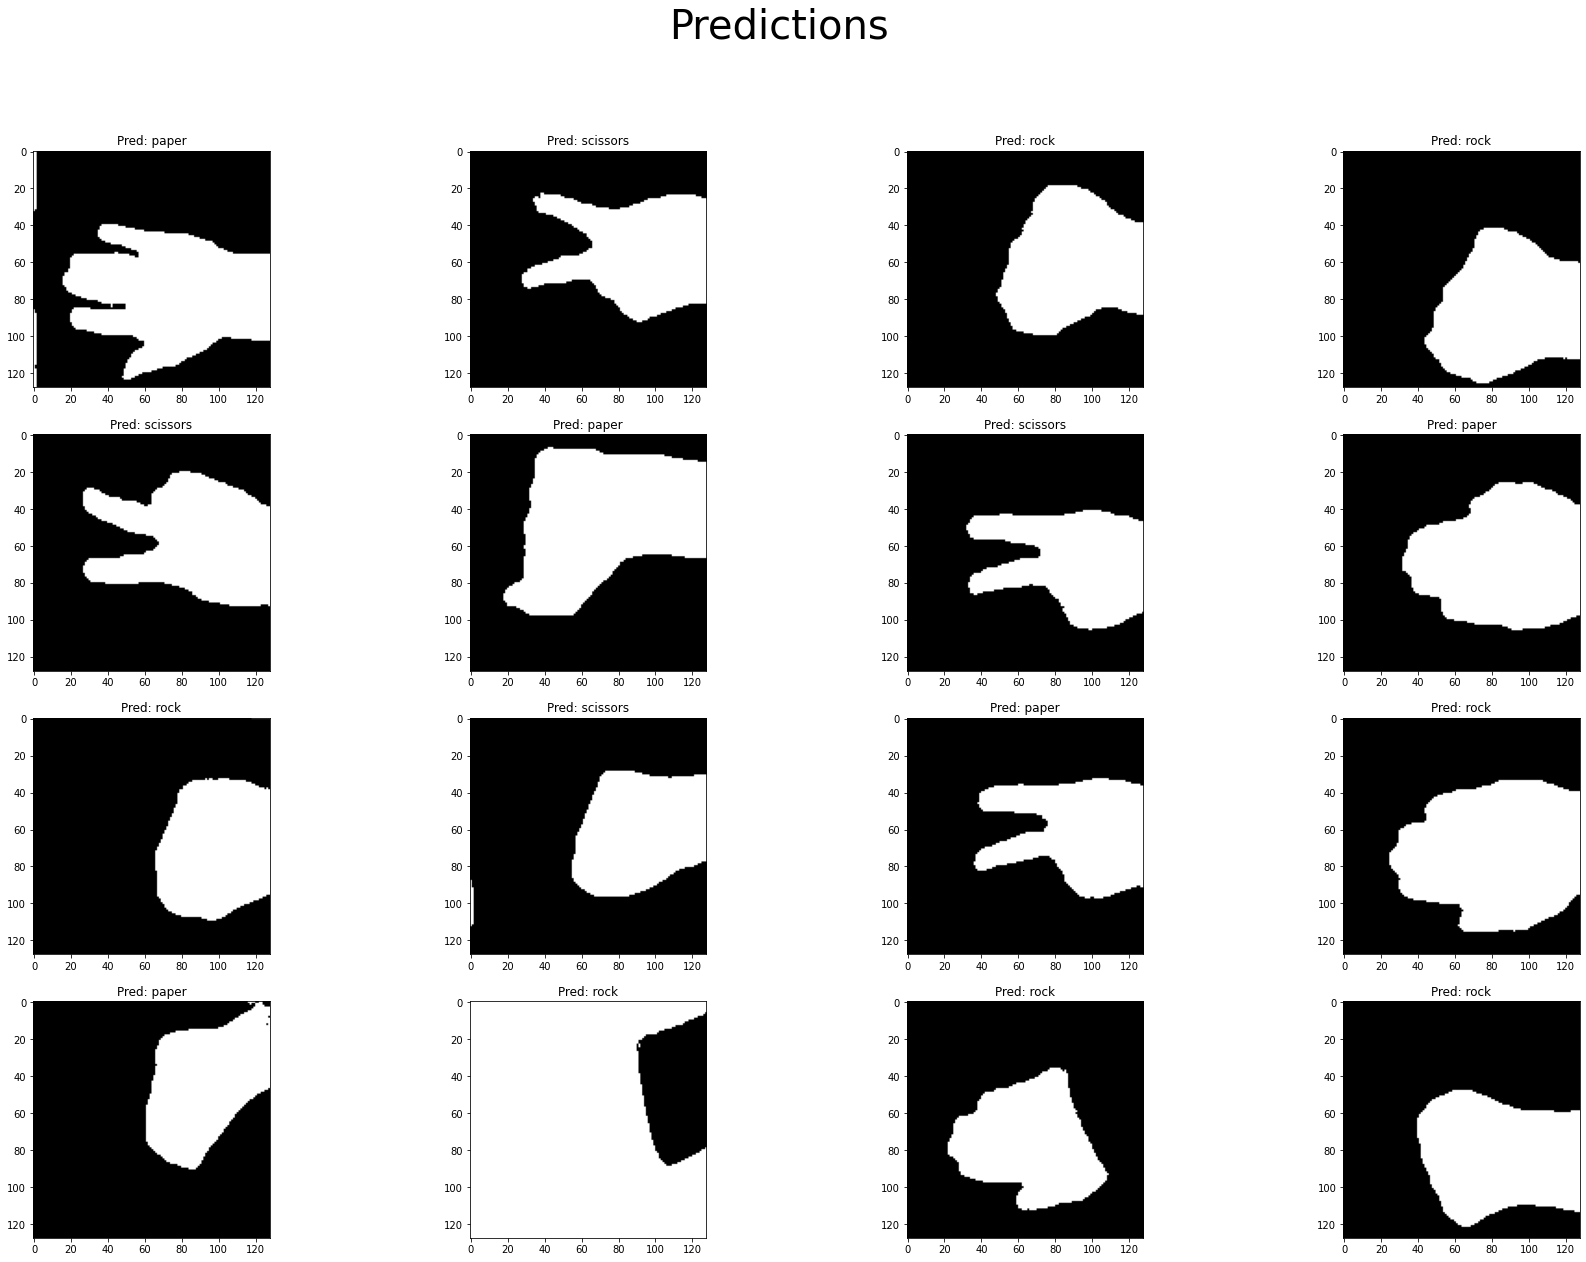

In [1030]:
show_pred(pred_forest, (0, 16))

### SVC

In [1031]:
from sklearn.svm import SVC
svc_model_0 = SVC()
svc_model_0.fit(prueba_train, Y_train)

# Calculamos el score
acc = svc_model_0.score(prueba_val, Y_val)
print("Precisión del modelo: {:.2f}%".format(acc * 100))

Precisión del modelo: 91.67%


C:\Users\diego.eusse\Anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


In [1032]:
pred_svc = svc_model_0.predict(prueba_val)

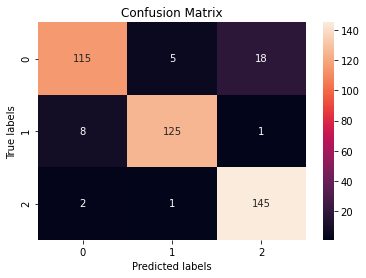

In [1033]:
import seaborn as sns  
cm = confusion_matrix(Y_val.values.ravel(), svc_model_0.predict(prueba_val))
ax= plt.subplot()
sns.heatmap(cm, annot=True, fmt='g', ax=ax); 

# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
#ax.xaxis.set_ticklabels(['grape', 'strawberry']); ax.yaxis.set_ticklabels(['grape', 'strawberry']);

<ipython-input-1018-1a324d051813>:6: MatplotlibDeprecationWarning: Passing non-integers as three-element position specification is deprecated since 3.3 and will be removed two minor releases later.
  plt.subplot(diff_s, diff_s, img_idx + 1)


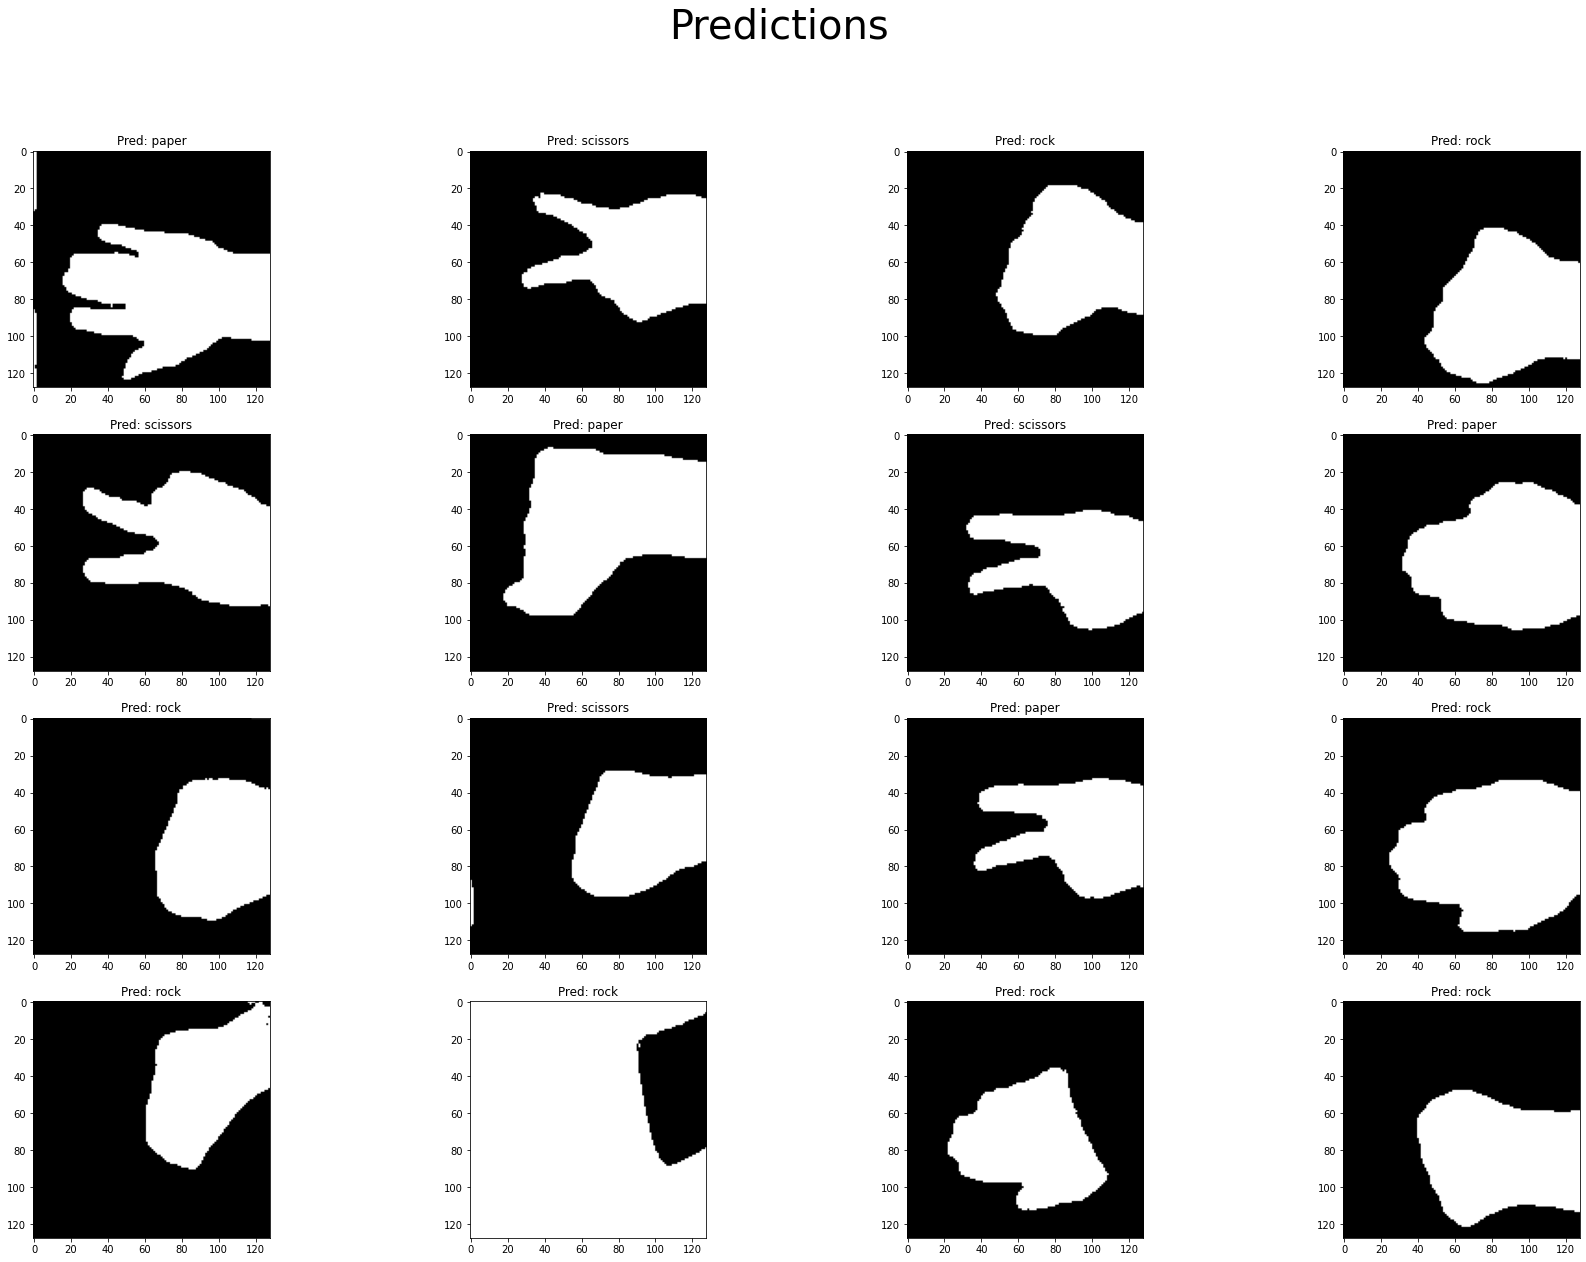

In [1034]:
show_pred(pred_svc, (0, 16))

## **8. Análisis de resultados**
En esta sección se resumen los resultados obtenidos por todos los modelos de Aprendizaje de máquinas y se selecciona el modelo que presente mejores resultados según los requisitos del problema.

## **9. Conclusiones**
Al final del trabajo, se exponen y justifican los resultados obtenidos.